# Convnets in TensorFlow

## Agenda
* Plaing with convolutions
* Convolution support in TF
* More MNIST
* Autoencorder

### convolutionを理解する
#### 数学 or 物理における Convolution
integrationによって与えられた2つの関数から派生した関数。
それは片方がもう一方によって修正されたshapeがどのようなものかを表現している
#### NNにおけるConvolution
*要素幅の乗算* によって与えられた2つの関数から派生した関数。
それは片方がもう一方によって修正された *shapeと値* がどのようなものかを表現している

1つのconvolution layerを使うことで画像を修正できる

```
tf.nn.conv2d(input, filter, strides, padding, use_cudnn_on_gpu=None, data_format=None, name=None)
```

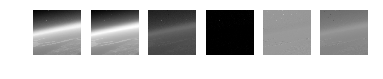

In [14]:
import kernels
import tensorflow as tf
from matplotlib import gridspec as gridspec
from matplotlib import pyplot as plt

FILENAME = './hoge.png'

def read_one_image(filename):
    filename_queue = tf.train.string_input_producer([filename])
    image_reader = tf.WholeFileReader()
    _, image_file = image_reader.read(filename_queue)
    image = tf.image.decode_png(image_file, channels=3)
    image = tf.cast(image, tf.float32) / 256.0
    return image

def convolve(image, kernels, rgb=True, strides=[1, 3, 3, 1], padding='SAME'):
    images = [image[0]]
    for i, kernel in enumerate(kernels):
        filtered_image = tf.nn.conv2d(image, kernel, strides=strides, padding=padding)[0]
        if i == 2:
            filtered_image = tf.minimum(tf.nn.relu(filtered_image), 255)
        images.append(filtered_image)
    return images

def get_real_images(images):
    with tf.Session() as sess:
        coord = tf.train.Coordinator()
        threads = tf.train.start_queue_runners(coord=coord)
        images = sess.run(images)
        coord.request_stop()
        coord.join(threads)
    return images

def show_images(images, rgb=True):
    gs = gridspec.GridSpec(1, len(images))
    for i, image in enumerate(images):
        plt.subplot(gs[0, i])
        if rgb:
            plt.imshow(image)
        else:
            image = image.reshape(image.shape[0], image.shape[1])
            plt.imshow(image, cmap='gray')
        plt.axis('off')
    plt.show()

def main():
    rgb = False
    if rgb:
        kernels_list = [kernels.BLUR_FILTER_RGB, kernels.SHARPEN_FILTER_RGB, kernels.EDGE_FILTER_RGB, kernels.TOP_SOBEL_RGB, kernels.EMBOSS_FILTER_RGB]
    else:
        kernels_list = [kernels.BLUR_FILTER, kernels.SHARPEN_FILTER, kernels.EDGE_FILTER, kernels.TOP_SOBEL, kernels.EMBOSS_FILTER]
    
    image = read_one_image(FILENAME)
    if not rgb:
        image = tf.image.rgb_to_grayscale(image)
    image = tf.expand_dims(image, 0)
    images = convolve(image, kernels_list, rgb)
    images = get_real_images(images)
    show_images(images, rgb)
        
if __name__ ==  '__main__':
    main()